# Отчет по лабораторной работе 4.2

## Исследование энергетического спектра β-частиц и определение их максимальной энергии при помощи магнитного спектрометра
Конкс Эрик, Б01-818

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy import odr

I = [i*0.2 for i in range(1, 15)] + [3+(i)*0.05 for i in range(9)] + [3.5, 3.6, 3.8, 3.85, 3.9, 3.95, 4]
N = [-0.365, -0.395, -0.675, 0.025, 1.695, 4.544, 5.923, 6.533, 6.803, 5.524, 3.934, 2.664, 1.535, 
     0.445, 1.185, 2.314, 2.554, 3.084, 2.984, 2.414, 0.645, -0.505, -1.404, -1.424, -1.444, -0.245, 
     -0.075, -0.205, -0.305, -0.365]
p = [64.8, 120.0, 192.0, 255.9, 319.9, 383.9, 447.9, 511.9, 575.9, 639.8, 703.8, 767.8, 831.8, 895.8,
    959.8, 975.7, 991.7, 1007.7, 1023.7, 1039.7, 1055.7, 1071.7, 1087.7, 1119.7, 1151.7, 1215.7,
    1231.7, 1247.7, 1263.7, 1279.7]
T = [4, 15.8, 34.9, 60.5, 91.9, 128.1, 168.5, 212.3, 258.9, 307.8, 358.8, 411.3, 465.2, 520.3, 576.3,
    590.5, 604.6, 618.9, 633.2, 647.5, 661.9, 676.3, 690.8, 719.8, 749.0, 807.7, 822.5, 837.3, 852.1, 866.9]
for i in range(len(N)):
    N[i] = 0 if N[i] < 0 else N[i]

mkFermi = np.sqrt(N) / np.power(p, 3/2) * 10**6
pd.DataFrame({'I, А': I, 'N-Nф': N, 'p, кэВ/с': p, 'T, кэВ': T, 'sqrt(N)/p^3/2': mkFermi})

,"I, А",N-Nф,"p, кэВ/с","T, кэВ",sqrt(N)/p^3/2
0,0.20,0.000,64.8,4.0,0.000000
1,0.40,0.000,120.0,15.8,0.000000
2,0.60,0.000,192.0,34.9,0.000000
3,0.80,0.025,255.9,60.5,38.624652
4,1.00,1.695,319.9,91.9,227.543006
5,1.20,4.544,383.9,128.1,283.394876
6,1.40,5.923,447.9,168.5,256.743391
7,1.60,6.533,511.9,212.3,220.687957
8,1.80,6.803,575.9,258.9,188.725080
9,2.00,5.524,639.8,307.8,145.231386


In [2]:
y = mkFermi[5:14]
x = T[5:14]
I_conv = 3.15
I_conv_d = 3
I_conv_u = 3.35
I_conv_err = (I_conv_u - I_conv_d) / 2
k_conv = 1013.5 / I_conv
k_conv_err = I_conv_err / I_conv * k_conv
p_err = [k_conv_err * i_i for i_i in I[5:14]]
y_err = [3 / 2 * p_err[i] * y[i] / p[5:14][i] for i in range(len(x))]
x_err = [p[5:14][i] * p_err[i] / np.sqrt(p[5:14][i]**2 + 511**2) for i in range(len(x))]
pd.DataFrame({'sqrt(N)/p': y, 'Δ(sqrt(N)/p)': y_err, 'Te-T': x, 'Δ(Te-T)': x_err})

,sqrt(N)/p,Δ(sqrt(N)/p),Te-T,Δ(Te-T)
0,283.394876,23.751283,128.1,12.883798
1,256.743391,21.516826,168.5,16.495033
2,220.687957,18.494621,212.3,20.240790
3,188.725080,15.815648,258.9,24.066495
4,145.231386,12.172455,307.8,27.933597
5,106.229047,8.903252,358.8,31.821523
6,76.717589,6.429690,411.3,35.713112
7,51.644707,4.328249,465.2,39.598954
8,24.880747,2.085174,520.3,43.473537


In [3]:
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [18, 14]

$$\frac{\sqrt{N(p)}}{p^{3/2}} \approx T_e - T$$

In [4]:
f = lambda p, x: p[0] * x + p[1]
quad_model = odr.Model(f)
data = odr.RealData(x, y, sx=x_err, sy=y_err)
modr = odr.ODR(data, quad_model, beta0=[0.002, 0.002])
out = modr.run()
beta_opt = out.beta
#beta_err = np.sqrt(np.diag(out.cov_beta))
beta_err = out.sd_beta
beta_name = ['a', 'b']
T_max = -beta_opt[1]/beta_opt[0]
print('Fit parameter 1-sigma error y = a * x + b')
print('———————————–—————————————————————————————')
for i in range(len(beta_opt)):
    print(f"{beta_name[i]} = {beta_opt[i]} +- {beta_err[i]}")
    print("    {:.2f} +- {:.2f}".format(beta_opt[i], beta_err[i]))
    
print(f"chisq = {out.res_var * (len(x) - len(beta_opt))}")

Fit parameter 1-sigma error y = a * x + b
———————————–—————————————————————————————
a = -0.6959092789283623 +- 0.02678092581121662
    -0.70 +- 0.03
b = 368.31482577216013 +- 8.652341894568837
    368.31 +- 8.65
chisq = 0.9884630767339769


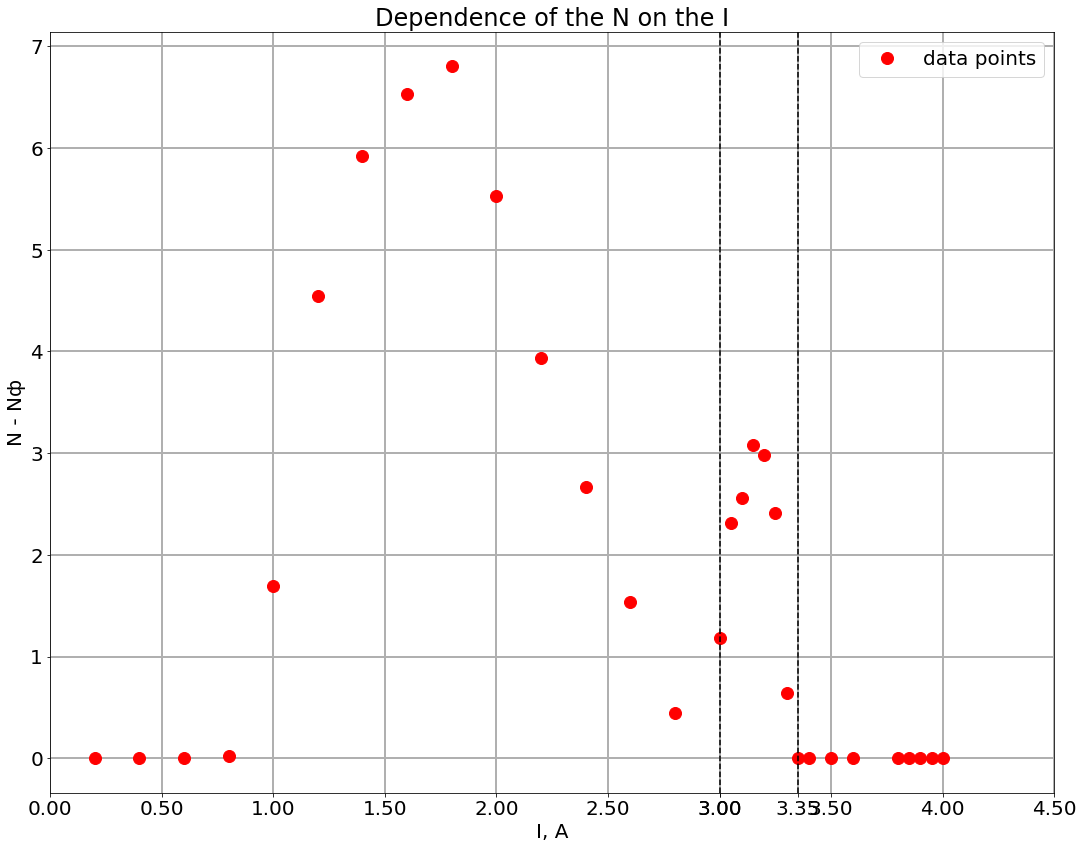

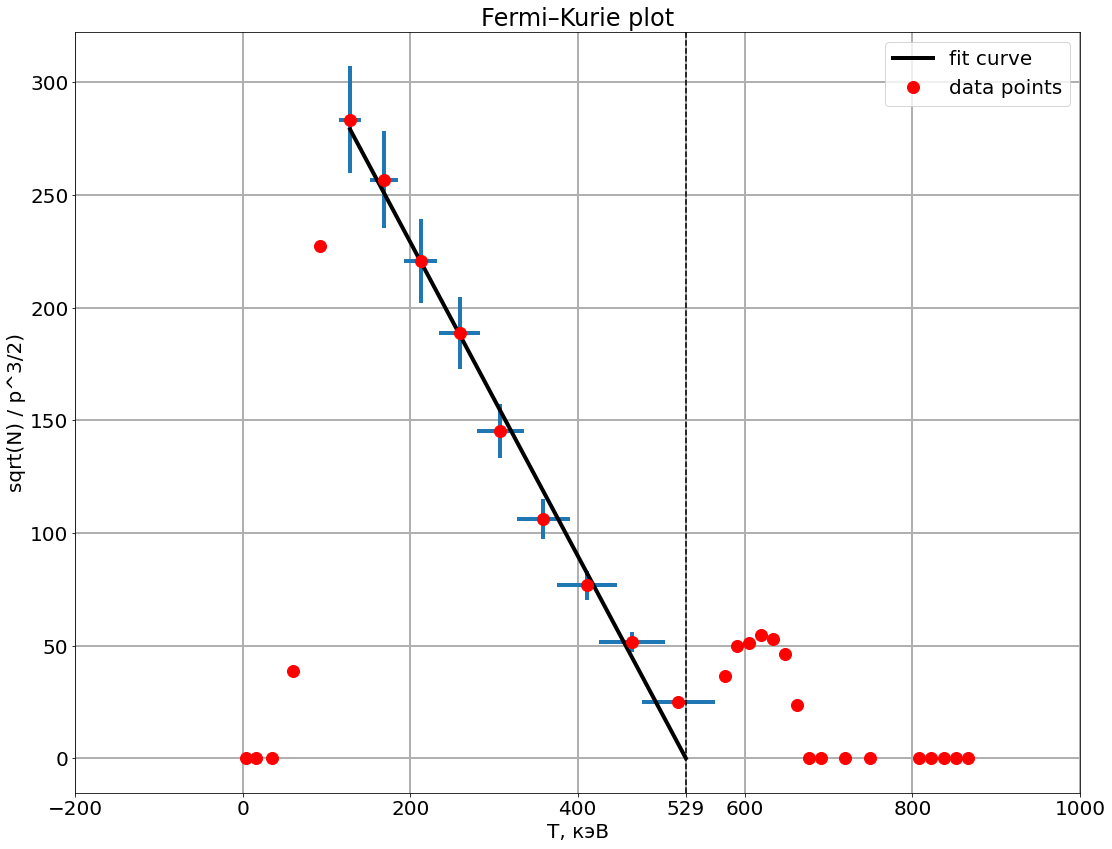

In [5]:
plot = plt.figure(num='Dependence of the N on the I')
plt.plot(I, N, 'ro', label='data points', markersize=12)
plt.grid(linewidth=2)
plt.legend()
plt.title('Dependence of the N on the I')
plt.xlabel('I, A')
plt.ylabel('N - Nф')
plt.axvline(x=I_conv_d, color="black", linestyle="--")
plt.axvline(x=I_conv_u, color="black", linestyle="--")
plt.xticks(sorted(list(plt.xticks()[0]) + [I_conv_d, I_conv_u]))
plot = plt.figure(num='Fermi–Kurie plot')
plt.plot(x + [T_max], [f(beta_opt, x_el) for x_el in x] + [0], color='black', linewidth=4, label='fit curve')
plt.plot(T, mkFermi, 'ro', label='data points', markersize=12)
plt.axvline(x=T_max, color="black", linestyle="--")
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt="none", linewidth=4)
plt.xlabel('T, кэВ')
plt.ylabel('sqrt(N) / p^3/2)')
plt.grid(linewidth=2)
plt.legend()
plt.title('Fermi–Kurie plot')
plt.xticks(sorted(list(plt.xticks()[0]) + [T_max]))
plt.show()

In [6]:
T_max_err = T_max * np.sqrt((beta_err[0] / beta_opt[0])**2 + (beta_err[1] / beta_opt[1])**2)
print('Result')
print('——————————————————————————————————————————————————')
print(f"T_max = {T_max} +- {T_max_err} кэВ")
print(f"T_max = {int(np.round(T_max))} +- {int(np.round(T_max_err))} кэВ")

Result
——————————————————————————————————————————————————
T_max = 529.2569547848706 +- 23.86255722956929 кэВ
T_max = 529 +- 24 кэВ
